In [1]:
from platform import python_version
print(python_version())

3.8.8


In [2]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [3]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17005553010360358772
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7055540224
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10567365625907829720
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 980M, pci bus id: 0000:01:00.0, compute capability: 5.2"
xla_global_id: 416903419
]


In [6]:
import pandas as pd

In [7]:
df = pd.read_json("mappingv3.json")

In [8]:
str(df["action_instances"][0]).split("name")

["[{'options': [{'id': 601225, '",
 '\': \'new email from\', \'params\': {"sender\'s address": \'contact@gs-store.de\'}}, {\'id\': 600599, \'',
 "': 'new email in inbox from', 'params': {'email address': 'contact@gs-store.de'}}]}, {'id': 700000, '",
 "': 'make a payment', 'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}}, {'id': 600603, '",
 "': 'send an email', 'params': {'attachment url': '<return2>', 'to address': 'contact@gs-store.de'}}]"]

In [9]:
df["action_instances"][0]

[{'options': [{'id': 601225,
    'name': 'new email from',
    'params': {"sender's address": 'contact@gs-store.de'}},
   {'id': 600599,
    'name': 'new email in inbox from',
    'params': {'email address': 'contact@gs-store.de'}}]},
 {'id': 700000,
  'name': 'make a payment',
  'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}},
 {'id': 600603,
  'name': 'send an email',
  'params': {'attachment url': '<return2>',
   'to address': 'contact@gs-store.de'}}]

In [10]:
len(df["action_instances"][0])

3

In [11]:
type(df["action_instances"][0][0])

dict

In [12]:
df["action_instances"][0][0]

{'options': [{'id': 601225,
   'name': 'new email from',
   'params': {"sender's address": 'contact@gs-store.de'}},
  {'id': 600599,
   'name': 'new email in inbox from',
   'params': {'email address': 'contact@gs-store.de'}}]}

In [13]:
str(df["action_instances"][0])

'[{\'options\': [{\'id\': 601225, \'name\': \'new email from\', \'params\': {"sender\'s address": \'contact@gs-store.de\'}}, {\'id\': 600599, \'name\': \'new email in inbox from\', \'params\': {\'email address\': \'contact@gs-store.de\'}}]}, {\'id\': 700000, \'name\': \'make a payment\', \'params\': {\'invoice\': \'<return1>.attachment\', \'method\': \'credit card\'}}, {\'id\': 600603, \'name\': \'send an email\', \'params\': {\'attachment url\': \'<return2>\', \'to address\': \'contact@gs-store.de\'}}]'

In [14]:
df["action_instances"][0]

[{'options': [{'id': 601225,
    'name': 'new email from',
    'params': {"sender's address": 'contact@gs-store.de'}},
   {'id': 600599,
    'name': 'new email in inbox from',
    'params': {'email address': 'contact@gs-store.de'}}]},
 {'id': 700000,
  'name': 'make a payment',
  'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}},
 {'id': 600603,
  'name': 'send an email',
  'params': {'attachment url': '<return2>',
   'to address': 'contact@gs-store.de'}}]

In [15]:
str(df["action_instances"][0]).split("\'name\': \'")

["[{'options': [{'id': 601225, ",
 'new email from\', \'params\': {"sender\'s address": \'contact@gs-store.de\'}}, {\'id\': 600599, ',
 "new email in inbox from', 'params': {'email address': 'contact@gs-store.de'}}]}, {'id': 700000, ",
 "make a payment', 'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}}, {'id': 600603, ",
 "send an email', 'params': {'attachment url': '<return2>', 'to address': 'contact@gs-store.de'}}]"]

In [16]:
data = str(df["action_instances"][0]).split("\'name\': \'")[1:]
data

['new email from\', \'params\': {"sender\'s address": \'contact@gs-store.de\'}}, {\'id\': 600599, ',
 "new email in inbox from', 'params': {'email address': 'contact@gs-store.de'}}]}, {'id': 700000, ",
 "make a payment', 'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}}, {'id': 600603, ",
 "send an email', 'params': {'attachment url': '<return2>', 'to address': 'contact@gs-store.de'}}]"]

In [17]:
for everyData in data:
    print(everyData.find("'"))
    val = everyData.find("'")
    print(everyData[:val])

14
new email from
23
new email in inbox from
14
make a payment
13
send an email


In [18]:
actions_val = []
for everyCommand in df["action_instances"]:
    data = str(everyCommand).split("\'name\': \'")[1:]
    temp = []
    for everyData in data:
        val = everyData.find("'")
        temp.append(everyData[:val])
    actions_val.append(temp)    

In [19]:
actions_val

[['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new deposit in your account from sender', 'send an email', 'send email'],
 ['new deposit in your account from sender', 'send an email', 'send email'],
 ['new deposit in your account from sender', 'send an email', 'send email'],
 ['new deposit in your account from sender', 'send an email', 'send email'],
 ['read file content',
  'translate',
  'translate',
  'translate',
  'create a text file',
  'create a text file',
  'create a document',
  'send an email'],
 ['read file content',
  'translate',
  'translate',
  'translate',
  'send an email',
 

In [20]:
df["action_instances"][10]

[{'id': 700002,
  'name': 'read file content',
  'params': {'file': 'question.doc'}},
 {'options': [{'id': 501371,
    'name': 'translate',
    'params': {'from': 'en', 'text': '<return1>', 'to': 'pt'}},
   {'id': 501915,
    'name': 'translate',
    'params': {'languageConverted': 'en',
     'languageToConvert': 'pt',
     'text': '<return1>'}},
   {'id': 503292,
    'name': 'translate',
    'params': {'input': '<return1>', 'source': 'en', 'target': 'pt'}}]},
 {'options': [{'id': 600603,
    'name': 'send an email',
    'params': {'body': '<return2>', 'to address': 'sandra@andrade.com.br'}},
   {'id': 601227,
    'name': 'send email',
    'params': {'body': '<return2>', 'recipients': 'sandra@andrade.com.br'}}]}]

In [21]:
df["nl_command_statment"].iloc[10]

'Find "question.doc" and translate the content of the file from English into Portuguese. Send this new text to Sandra. Once she sends back the reviewed message, send it to Brazilian embassy.'

In [22]:
import itertools
s = ",".join(itertools.chain(*actions_val))

In [23]:
len(set(s.split(",")))

73

In [24]:
for val in actions_val:
    print(len(val))

4
4
4
4
4
3
3
3
3
8
6
6
8
4
8
8
8
8
8
2
2
2
2
2
2
2
2
3
3
5
5
5
5
5
2
2
2
2
2
2
3
3
3
3
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
6
6
6
6
6
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
2
2
2
2
14
10
8
6
4
6
4
5
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
4
3
4
5
3
3
3
3
3
4
3
3
2
3
3
2
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
7
1
1
1
1
1
7
7
2
2
2
1
3
2
12
5


In [25]:
temp = []
for val in actions_val:
    temp.append(len(val))

In [26]:
max(temp), min(temp)

(14, 1)

In [27]:
temp.index(14)

95

In [28]:
actions_val[95]

['new email from',
 'new email in inbox from',
 'read file content',
 'translate',
 'translate',
 'translate',
 'create a text file',
 'create a text file',
 'create a document',
 'send an email',
 'new email from',
 'new email in inbox from',
 'send an email',
 'send email']

In [29]:
df["action_instances"][95]

[{'options': [{'id': 601225,
    'name': 'new email from',
    'params': {"sender's address": 'carmen@souza.cl'}},
   {'id': 600599,
    'name': 'new email in inbox from',
    'params': {'email address': 'carmen@souza.cl'}}]},
 {'id': 700002,
  'name': 'read file content',
  'params': {'file': '<return1>.attachment'}},
 {'options': [{'id': 501371,
    'name': 'translate',
    'params': {'from': 'de', 'text': '<return2>', 'to': 'en'}},
   {'id': 501915,
    'name': 'translate',
    'params': {'languageConverted': 'de',
     'languageToConvert': 'en',
     'text': '<return2>'}},
   {'id': 503292,
    'name': 'translate',
    'params': {'input': '<return2>', 'source': 'de', 'target': 'en'}}]},
 {'options': [{'id': 600209,
    'name': 'create a text file',
    'params': {'content': '<return3>', 'file name': 'english-version.txt'}},
   {'id': 600350,
    'name': 'create a text file',
    'params': {'content': '<return3>', 'file name': 'english-version.txt'}},
   {'id': 600614,
    'name': '

In [30]:
df["nl_command_statment"].iloc[95]

'Get the CV attached to a new email sent by Carmen Souza. Translate it from German to English saving the content in "english-version.txt" and send the new copy to Maria Helena by email saying: Please, see if this candidate is suitable for our opened position. When she answers, forward the message to Mrs Souza.'

In [31]:
df["only_actions"] = actions_val

In [32]:
df.head()

,action_instances,id,nl_command_statment,only_actions
0,"[{'options': [{'id': 601225, 'name': 'new emai...",101,Pay the invoice that I will receive from conta...,"[new email from, new email in inbox from, make..."
1,"[{'options': [{'id': 601225, 'name': 'new emai...",102,Pay in the bank my purchases that I will soon ...,"[new email from, new email in inbox from, make..."
2,"[{'options': [{'id': 601225, 'name': 'new emai...",105,Make a payment using my bank account when I re...,"[new email from, new email in inbox from, make..."
3,"[{'options': [{'id': 601225, 'name': 'new emai...",106,Pay my Good Sports Store account balance using...,"[new email from, new email in inbox from, make..."
4,"[{'options': [{'id': 601225, 'name': 'new emai...",107,Wait for a new email from the sender contact@g...,"[new email from, new email in inbox from, make..."


In [33]:
# df["new_input"] = "<boF> " + df["nl_command_statment"] 
df["new_input"] = df["nl_command_statment"] 

In [34]:
df.head()

,action_instances,id,nl_command_statment,only_actions,new_input
0,"[{'options': [{'id': 601225, 'name': 'new emai...",101,Pay the invoice that I will receive from conta...,"[new email from, new email in inbox from, make...",Pay the invoice that I will receive from conta...
1,"[{'options': [{'id': 601225, 'name': 'new emai...",102,Pay in the bank my purchases that I will soon ...,"[new email from, new email in inbox from, make...",Pay in the bank my purchases that I will soon ...
2,"[{'options': [{'id': 601225, 'name': 'new emai...",105,Make a payment using my bank account when I re...,"[new email from, new email in inbox from, make...",Make a payment using my bank account when I re...
3,"[{'options': [{'id': 601225, 'name': 'new emai...",106,Pay my Good Sports Store account balance using...,"[new email from, new email in inbox from, make...",Pay my Good Sports Store account balance using...
4,"[{'options': [{'id': 601225, 'name': 'new emai...",107,Wait for a new email from the sender contact@g...,"[new email from, new email in inbox from, make...",Wait for a new email from the sender contact@g...


In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_tokenizer = Tokenizer()
input_tokenizer.fit_on_texts(df['new_input'])
Source_vocabulary = input_tokenizer.word_index.keys()

In [36]:
output_tokenizer = Tokenizer()
output_tokenizer.fit_on_texts( df['only_actions'] )
target_vocabulary = output_tokenizer.word_index.keys()

In [37]:
input_int = input_tokenizer.texts_to_sequences(df['new_input'])
output_int = output_tokenizer.texts_to_sequences(df['only_actions'])

In [38]:
max_source_seq_length =  len(max( input_int ,key=len))

max_target_seq_length = len(max( output_int ,key=len))

num_source_tokens = len(input_tokenizer.word_counts)

num_target_tokens = len(output_tokenizer.word_counts)

number_of_samples = df.shape[0]


print('Number of samples:', number_of_samples )
print('Number of unique source language tokens:', num_source_tokens)
print('Number of unique target language tokens:', num_target_tokens)
print('Max sequence length of source language:', max_source_seq_length)
print('Max sequence length of target language:', max_target_seq_length)
print("Source Vocabulary",list(Source_vocabulary)[:10])
print("Target Vocabulary",list(target_vocabulary)[:10])

Number of samples: 180
Number of unique source language tokens: 662
Number of unique target language tokens: 73
Max sequence length of source language: 56
Max sequence length of target language: 14
Source Vocabulary ['the', 'to', 'my', 'in', 'send', 'and', 'a', 'it', 'on', 'of']
Target Vocabulary ['send an email', 'send email', 'new email from', 'new email in inbox from', 'post message', 'change color', 'search image on flickr', 'tweets from search', 'translate', 'new item from search']


In [39]:
import fasttext
import fasttext.util

# English Embeddings 
fasttext_model = fasttext.load_model(r"D:\jupyter_notebook_project\NUIG\SEM 2\advance NLP\assignmentsssssssss\assignment 3\cc.en.300.bin")
# fasttext_dict = {word: model.get_word_vector(word) for word in model.get_words()}
# del model

In [40]:
import numpy as np

pad_input = np.zeros((max_source_seq_length, num_source_tokens), dtype='float32')

pad_output = np.zeros((max_target_seq_length, num_target_tokens), dtype='float32')

In [41]:
import tensorflow as tf

In [42]:
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from tensorflow.keras.layers import Input, LSTM, Dense,Flatten, TimeDistributed, SimpleRNN, Flatten , Reshape, Embedding
from tensorflow.keras.models import Model, Sequential

embed_mat_english = np.zeros((num_source_tokens+1, 300))
for value, position in input_tokenizer.word_index.items():
    embedding_vect = fasttext_model.get_word_vector(value)
    if embedding_vect is not None:
        embed_mat_english[position] = embedding_vect
    else:
        print("Hits value " , value ," position " , position)

english_layer_embedding = Embedding(num_source_tokens+1, 300, 
                         weights = [embed_mat_english],
                            input_length = max_source_seq_length , 
                                    trainable = False,
                                mask_zero = True) #using pre-trained embeddings

In [43]:
#pad the sequences to the same length
pad_input_val = pad_sequences(input_int, maxlen=max_source_seq_length,padding='post')
print("endcoder input shape", pad_input_val.shape)

#add padding for encoder after the sentence integers
pad_output_val = pad_sequences(output_int, maxlen=max_target_seq_length,padding='post' )
print("decoder input shape", pad_output_val.shape)

endcoder input shape (180, 56)
decoder input shape (180, 14)


In [44]:
reshaped_input = pad_input_val.reshape(180, 56, 1)
reshaped_output = pad_output_val.reshape( 180, 14 )

In [45]:
reshaped_input.shape, reshaped_output.shape

((180, 56, 1), (180, 14))

In [46]:
reshaped_output

array([[ 3,  4, 31, ...,  0,  0,  0],
       [ 3,  4, 31, ...,  0,  0,  0],
       [ 3,  4, 31, ...,  0,  0,  0],
       ...,
       [65,  5,  0, ...,  0,  0,  0],
       [66, 53, 54, ..., 73,  0,  0],
       [66, 53, 54, ...,  0,  0,  0]])

In [47]:
reshaped_output = to_categorical(reshaped_output)

In [48]:
reshaped_output.shape

(180, 14, 74)

In [71]:
tdd = Input(shape= (56) )
x = english_layer_embedding(tdd)

encoder = LSTM(56, return_sequences=False, return_state= True)

encoder_outputs, state_h, state_c = encoder(x)
encoder_states = [state_h, state_c]


decoder_inputs = Input(shape=(56, 1 ))
decoder_lstm = LSTM(56, return_sequences=True, return_state=True)
decoder_outputs, h1, c1  = decoder_lstm(decoder_inputs, initial_state = encoder_states)

decoder_lstm = LSTM(56, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_outputs)

decoder_dense = TimeDistributed(Dense(56, activation="softmax"))
decoder_outputs = decoder_dense(decoder_outputs)

flat = Flatten()
decoder_outputs = flat(decoder_outputs)

decoder_dense = Dense(1036, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

decoder_outputs = tf.reshape(decoder_outputs , (1, 14,74))


# decoder_dense = Dense(14, activation="relu")
# decoder_outputs = decoder_dense(decoder_outputs)


In [72]:
model = Model([tdd, decoder_inputs], decoder_outputs)

In [73]:
# model.compile(optimizer='RMSprop', loss="categorical_crossentropy" ,metrics=[tf.keras.metrics.BinaryAccuracy() ,'accuracy'])
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss= losses.CategoricalCrossentropy(from_logits=False)  , metrics=["accuracy" ])
# model.compile(optimizer='RMSprop', loss= losses.SparseCategoricalCrossentropy(from_logits=False ))

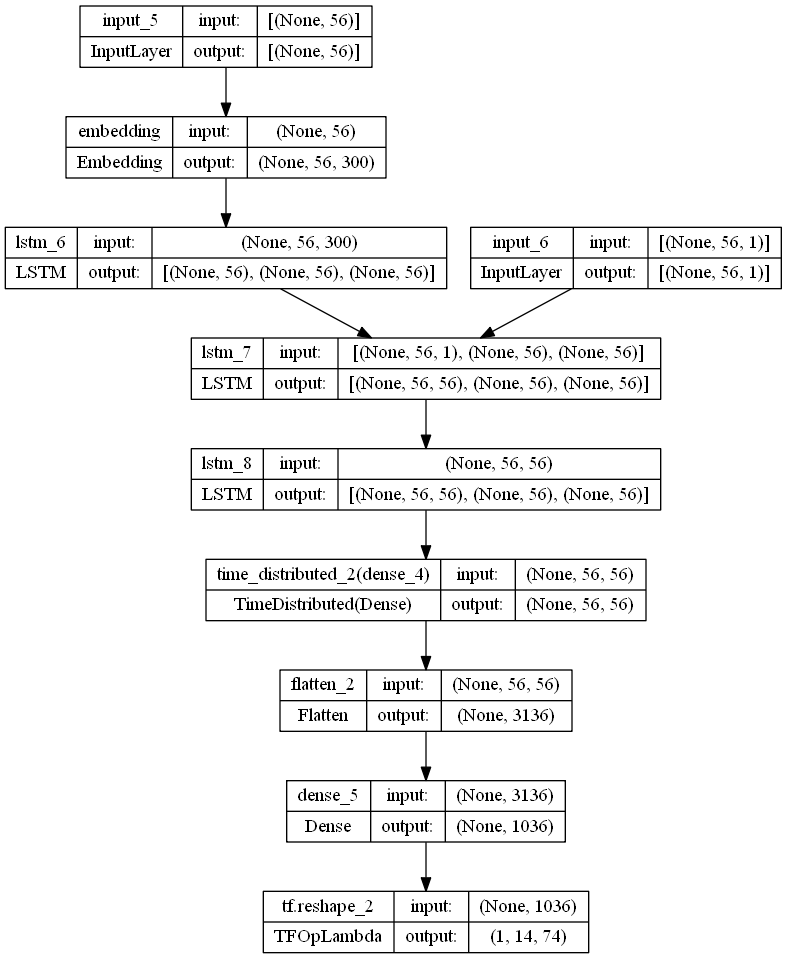

In [74]:
plot_model(model, show_shapes=True)

In [75]:
np.any(np.isnan(reshaped_input))

False

In [76]:
print(reshaped_input.shape, reshaped_output.shape )
history = model.fit([reshaped_input , reshaped_input ] , reshaped_output,  epochs=100, batch_size= 1 , shuffle=True , validation_split=0.2)

(180, 56, 1) (180, 14, 74)
Epoch 1/100
144/144 [==============================] - 10s 35ms/step - loss: 1.2429 - accuracy: 0.7644 - val_loss: 2.3088 - val_accuracy: 0.7083
Epoch 2/100
144/144 [==============================] - 3s 23ms/step - loss: 0.8805 - accuracy: 0.7718 - val_loss: 2.8086 - val_accuracy: 0.6964
Epoch 3/100
144/144 [==============================] - 3s 23ms/step - loss: 0.8243 - accuracy: 0.7768 - val_loss: 3.4319 - val_accuracy: 0.6984
Epoch 4/100
144/144 [==============================] - 3s 23ms/step - loss: 0.7958 - accuracy: 0.7917 - val_loss: 3.1140 - val_accuracy: 0.7044
Epoch 5/100
144/144 [==============================] - 3s 23ms/step - loss: 0.7436 - accuracy: 0.7917 - val_loss: 3.5843 - val_accuracy: 0.7044
Epoch 6/100
144/144 [==============================] - 3s 23ms/step - loss: 0.7020 - accuracy: 0.7986 - val_loss: 3.5318 - val_accuracy: 0.7024
Epoch 7/100
144/144 [==============================] - 3s 23ms/step - loss: 0.6741 - accuracy: 0.7986 - val_

144/144 [==============================] - 3s 22ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 3.5873 - val_accuracy: 0.6984
Epoch 58/100
144/144 [==============================] - 3s 22ms/step - loss: 0.0292 - accuracy: 0.9921 - val_loss: 4.0022 - val_accuracy: 0.7044
Epoch 59/100
144/144 [==============================] - 3s 23ms/step - loss: 0.0260 - accuracy: 0.9911 - val_loss: 3.9710 - val_accuracy: 0.6984
Epoch 60/100
144/144 [==============================] - 3s 22ms/step - loss: 0.0213 - accuracy: 0.9940 - val_loss: 4.1218 - val_accuracy: 0.7083
Epoch 61/100
144/144 [==============================] - 3s 23ms/step - loss: 0.0248 - accuracy: 0.9911 - val_loss: 4.0253 - val_accuracy: 0.7004
Epoch 62/100
144/144 [==============================] - 3s 23ms/step - loss: 0.0204 - accuracy: 0.9921 - val_loss: 4.1128 - val_accuracy: 0.7024
Epoch 63/100
144/144 [==============================] - 3s 22ms/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 4.0745 - val_accuracy: 0.696

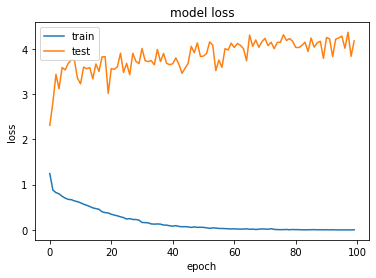

<Figure size 432x288 with 0 Axes>

In [77]:
import matplotlib.pyplot as plt  
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('foo.png')

In [78]:
int(np.mean(history.history['loss'])) , np.mean(history.history['accuracy']) *100

(0, 94.85317468643188)

In [79]:
np.mean(history.history['loss']) , np.mean(history.history['accuracy'])

(0.18058140889945207, 0.9485317468643188)

In [80]:
reshaped_input[:1 , : , : ]

array([[[193],
        [  1],
        [299],
        [ 31],
        [ 23],
        [ 73],
        [ 46],
        [ 15],
        [ 55],
        [194],
        [ 74],
        [195],
        [ 18],
        [  3],
        [404],
        [300],
        [106],
        [  5],
        [  1],
        [126],
        [196],
        [  2],
        [197],
        [ 61],
        [  1],
        [301],
        [405],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]]])

In [81]:
reshaped_output[:1 , :  ]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [82]:
model.predict( [reshaped_input[:1 , : , : ] , reshaped_input[:1 , : , : ]]  )

1/1 [==============================] - 2s 2s/step


array([[[5.2640979e-34, 5.7102323e-31, 4.6732421e-34, ...,
         4.5034121e-34, 5.4857952e-34, 5.7752203e-34],
        [3.4823159e-35, 1.4940340e-34, 6.7621606e-31, ...,
         3.7817651e-34, 3.7804957e-34, 3.4298597e-34],
        [1.2779181e-37, 2.6420372e-30, 2.0790843e-35, ...,
         5.9559297e-35, 6.1502915e-35, 5.4208261e-35],
        ...,
        [2.4678299e-01, 1.5287886e-10, 1.6988864e-10, ...,
         1.7000405e-10, 2.3864735e-10, 1.4650151e-10],
        [2.0409492e-01, 5.9750697e-08, 1.4368326e-10, ...,
         1.4557838e-10, 1.4606541e-10, 1.5271390e-10],
        [2.3853742e-01, 1.7474439e-10, 6.4451321e-08, ...,
         1.8273941e-10, 1.6872161e-10, 1.8276834e-10]]], dtype=float32)

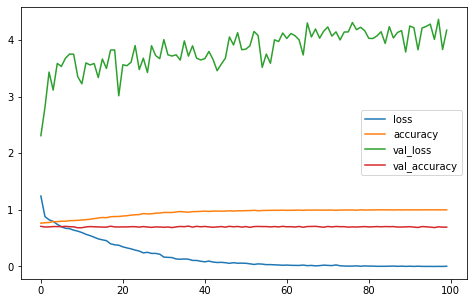

In [83]:
# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [85]:
t = model.predict( [reshaped_input[:1 , : , : ] , reshaped_input[:1 , : , : ]]  ) 

1/1 [==============================] - 0s 32ms/step


In [87]:
t.min()

4.0290091e-38